# $(T)\ Two\ Body\ Cases$

## NEWTON LIMIT REGIME $\quad m_1 \ll m_2$

### NEWTON LIMIT BOUND

Old case test

E = 8.93e+35 J, |p_1| = 5.96e+32 kg m/s, |p_2| = 5.96e+32 kg m/s, |L_1| = 1.76e+39 kg m^2/s, |L_2| = 1.76e+35 kg m^2/s, R_S = 2.95e+03 m, b = 1.48e+06 m,


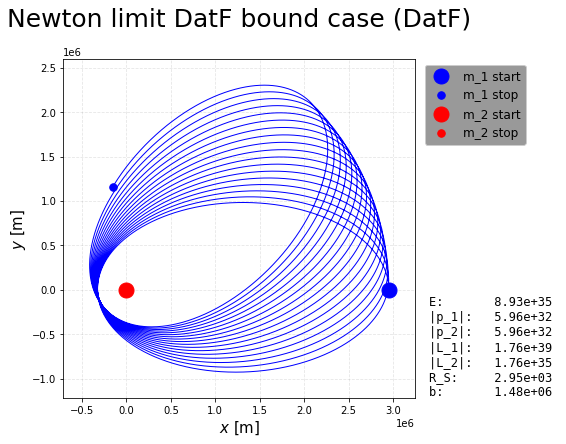

In [1]:
%run ./Orbital_Functions.ipynb

m_1 = 1e-4*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000, 0.])*R_S
x_2 = np.array([0.,   0.])*R_S
v_1 = np.array([0., 0.01])*c
v_2 = np.array([0.,    0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, α=1, DatF = True)
# pos1, pos2, pos_CM, parameters accs = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, α=1, DatF = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Newton limit DatF bound case (DatF)')

E, p_1_len, p_2_len, L_1_len, L_2_len, R_S, b = parameters
print(f'E = {E:.2e} J,', f'|p_1| = {p_1_len:.2e} kg m/s,', f'|p_2| = {p_2_len:.2e} kg m/s,', f'|L_1| = {L_1_len:.2e} kg m^2/s,', f'|L_2| = {L_2_len:.2e} kg m^2/s,', f'R_S = {R_S:.2e} m,', f'b = {b:.2e} m,')

# 2.1s

EIH α check $\ \downarrow$

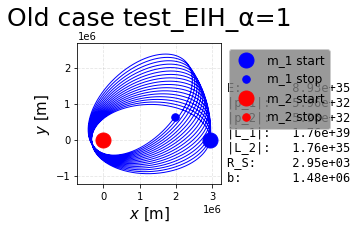

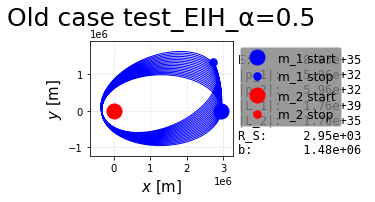

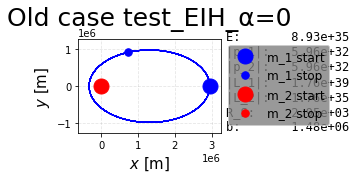

In [2]:
αs = [1,0.5,0]
for i in αs:
    pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2027500*R_S/c, dt=20*R_S/c, EIH=True, α = i)
    # pos1, pos2, pos_CM, parameters, accs = run_model(s, t_max = 2027500*R_S/c, dt=100*R_S/c, EIH=True)
    orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename=f'Old case test_EIH_α={i}', figsize=(6,6))

# dt STABILIZED at 20*R_S/c
# 30s

___
Earth-Sun System

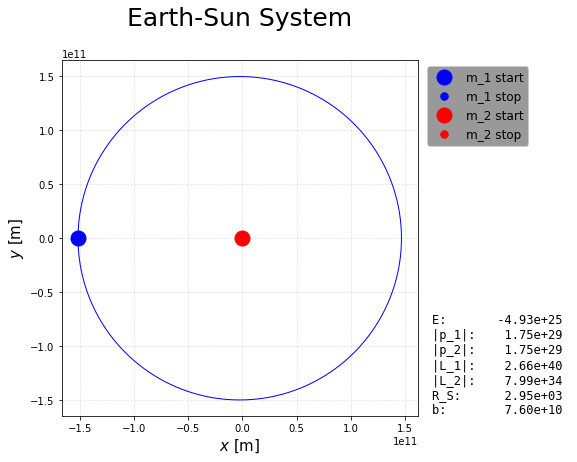

In [3]:
%run ./Orbital_Functions.ipynb

m_1 = M_earth
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-152.100e9, 0])
x_2 = np.array([0.,         0])*R_S
v_1 = np.array([0.,   29.29e3])
v_2 = np.array([0.,         0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 3.2e12*R_S/c, dt = 1e9*R_S/c, EIH = True)

orbPlotter(pos1, pos2, pos_CM, parameters, CM=False, filename='Earth-Sun System')

# 0.8s

Eccentricity Check $\displaystyle e = \sqrt{1 - \frac{b^2}{a^2}}$

In [4]:
pos1_CM = pos1 - pos_CM
xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

a = max(xmax - xmin, ymax - ymin)
b = min(xmax - xmin, ymax - ymin)

e = np.sqrt(1 - b**2/a**2)
print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')

# ~1s

a = 2.992e+11 meter, b = 2.991e+11 meter, e = 0.017


We get $e_\mathrm{predicted} \approx 0.017$ which fits nicely with the expected value of $e_\mathrm{expected} \approx 0.017$.

___
Mercury-Sun System

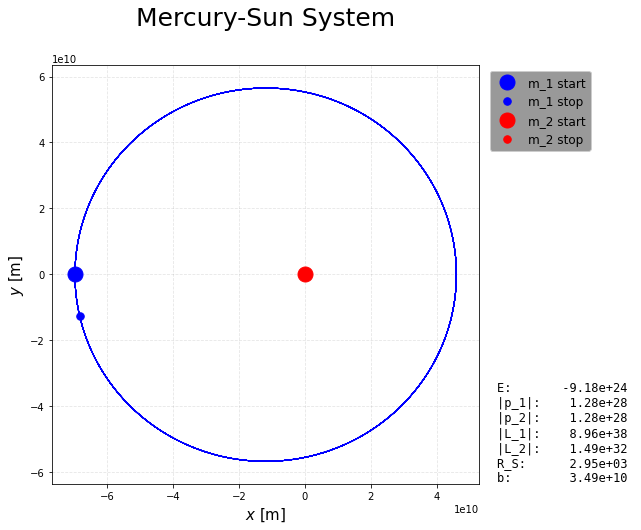

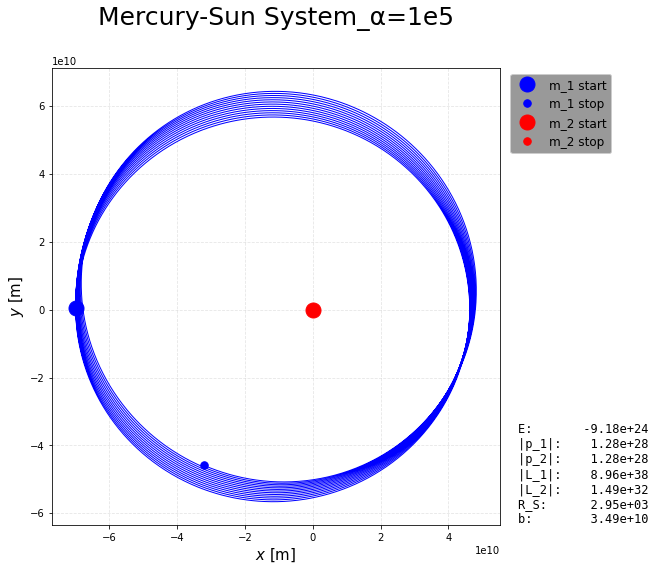

In [5]:
%run ./Orbital_Functions.ipynb

m_1 = 0.3301e24
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-69.818e9, 0.])
x_2 = np.array([0.,        0.])
v_1 = np.array([0.,   38.86e3])
v_2 = np.array([0.,         0])


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1e13*R_S/c, dt = 1e9*R_S/c, EIH = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Mercury-Sun System', figsize=(9,9))
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 1e13*R_S/c, dt = 1e9*R_S/c, EIH = True, α=1e5)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Mercury-Sun System_α=1e5', figsize=(9,9))

# dt STABILIZED at 1e9*R_S/c
# ~10s

___
Icarus-Sun System

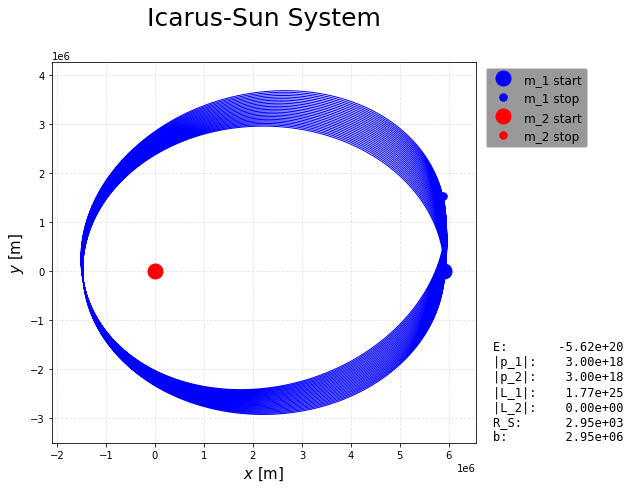

In [6]:
%run ./Orbital_Functions.ipynb

m_1 = 0.001e15
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000., 0.])*R_S
x_2 = np.array([-1000.,0.])*R_S
v_1 = np.array([0.,  0.01])*c
v_2 = np.array([0.,     0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000000*R_S/c, dt = 500*R_S/c, EIH = True)

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Icarus-Sun System',figsize=(9,9))



___
DatF bound case

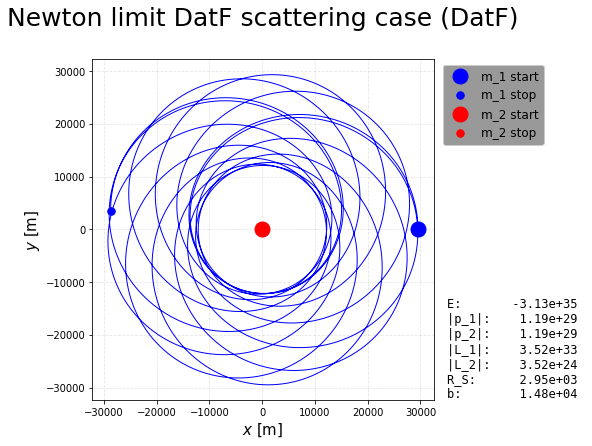

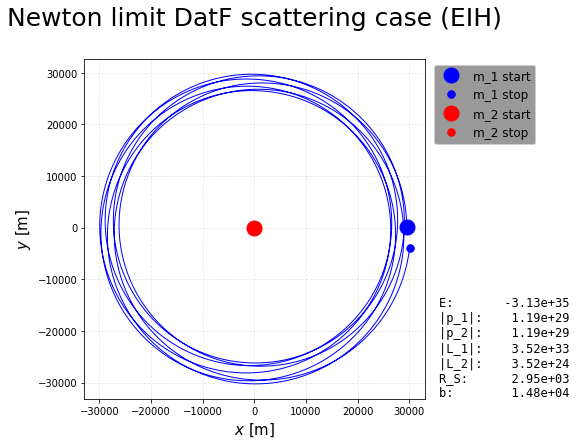

In [7]:
s3 = [0,10,0.2,-0.25]

m_1 = 1e-9*M_sun
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([10.,  0.])*R_S
x_2 = np.array([0.,    0])*R_S
v_1 = np.array([0,   0.2])*c
v_2 = np.array([0.,    0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2000*R_S/c, dt = 0.1*R_S/c, DatF = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Newton limit DatF scattering case (DatF)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 2000*R_S/c, dt = 0.1*R_S/c, EIH = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Newton limit DatF scattering case (EIH)')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_lims(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 1')

# dt STABILIZED
# 4.8s

### NEWTON LIMIT SCATTERING

In [8]:
m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -0.5e6])
x_2 = np.array([0.,        0])
v_1 = np.array([0.1,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 17500*R_S/c, dt = 1*R_S/c, EIH = True)

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, figsize=(10,10))
lims = np.array([-2e6, 2.5e6])
orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 1')

# 1.7s

TypeError: orbPlotter_lims() got multiple values for argument 'xlim'

In [ ]:
m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -0.5e6])
x_2 = np.array([0.,        0])
v_1 = np.array([0.05,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 25000*R_S/c, dt = 3*R_S/c, EIH = True)

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, figsize=(10,10))
lims = np.array([-2e6, 2e6])
orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 2')

# 1.2s

___
DatF scattering case

In [ ]:
s3 = [0,10,0.2,-0.25]

m_1 = M_sun
m_2 = 1e20*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([10.,    0.])*R_S
x_2 = np.array([0.,      0])*R_S
v_1 = np.array([-0.25, 0.2])*c
v_2 = np.array([0.,      0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, DatF = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Newton limit DatF scattering case (DatF)')

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100*R_S/c, dt = 0.01*R_S/c, EIH = True)
orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Newton limit DatF scattering case (EIH)')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 1')

# dt STABILIZED
# ~3s

# BLACK HOLE REGIME CHECK $\quad m \sim 10M_\mathrm{sun}$

In [ ]:
%run ./Orbital_Functions.ipynb
c = const.c.value
G = const.G.value
M_sun = const.M_sun.value

## SYMMETRY TEST

In [ ]:
%run ./Orbital_Functions.ipynb

m_1 = M_sun*5
m_2 = M_sun*5

x_1 = np.array([1e9,  0.0])
x_2 = np.array([0.0,  0.0])
v_1 = np.array([0.0,  3e5])
v_2 = np.array([0.0, -2e5])

s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, posCM, parameters = run_model(s, t_max = 5e3, dt=0.01, EIH = True)
pos1, pos2, posCM, parameters = run_model(s, t_max = 5e3, dt=1, EIH = True)
orbPlotter(pos1, pos2, posCM, parameters, CM = True, filename='Black hole symmetry test', figsize=(9,9))

# ~2s

## BOUND CASE

In [ ]:
m_1 = 3*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000.,  0.])*R_S
x_2 = np.array([-1000., 0.])*R_S
v_1 = np.array([0,   0.01])*c
v_2 = np.array([0.,  0.02])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 10000000*R_S/c, dt = 10*R_S/c, EIH = True)

orbPlotter(pos1, pos2, pos_CM, parameters, CM=True, filename='Black hole bound case 1', figsize=(9,9))
# lims = (-2e7, 2e7)
# orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole bound case 1', figsize=(9,9))

# 1m 22.1s

# BLACK HOLE SCATTERING

In [ ]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-5e2,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.1,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM, parameters = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH = True)

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
lims = (-2e7, 2e7)
orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=lims, ylim=lims, CM=True, filename='Black hole scattering 1', figsize=(8,8))

# 1.9s

## BLACK HOLE VERY $dt$ DEPENDENT

In [ ]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-2e3,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.02,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM, parameters = run_model(s, t_max = 100000*R_S/c, dt = 1*R_S/c, EIH = True)

# orbPlotter(pos1, pos2, pos_CM, parameters, CM=True)
limss = np.array([(-1e8, 1e8), (-1e7, 1e7), (-1e6, 1e6)])
for i in limss:
    orbPlotter_lims(pos1, pos2, pos_CM, parameters, xlim=i, ylim=i, CM=True)

# 9.2s